In [1]:
%matplotlib inline

from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy
from pt_tex_synth import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor

def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

In [15]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    #plt.pause(0.001) # pause a bit so that plots are updated

def imsave(tensor, savepath=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    image.save(savepath)    

In [5]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)


In [7]:
# Specify the style image to match
style_img = image_loader("/Users/akshay/proj/TextureSynthesis/stimuli/textures/orig_color/cherries.jpg")

# Randomly initialize white noise input image
input_img = torch.randn(style_img.data.size(), device=device)
orig_input = input_img.cpu().clone(); # save it to a different filename

# Specify num_steps
num_steps = 300

output_leaves = run_texture_synthesis(cnn, cnn_normalization_mean, cnn_normalization_std,
                            style_img, input_img, num_steps=num_steps)

Building the style transfer model..


pt_tex_synth.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
pt_tex_synth.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Optimizing..
run [50]:
Style Loss : 1325.536011

run [100]:
Style Loss : 187.913574

run [150]:
Style Loss : 72.146530

run [200]:
Style Loss : 41.438599

run [250]:
Style Loss : 29.269989

run [300]:
Style Loss : 22.646847



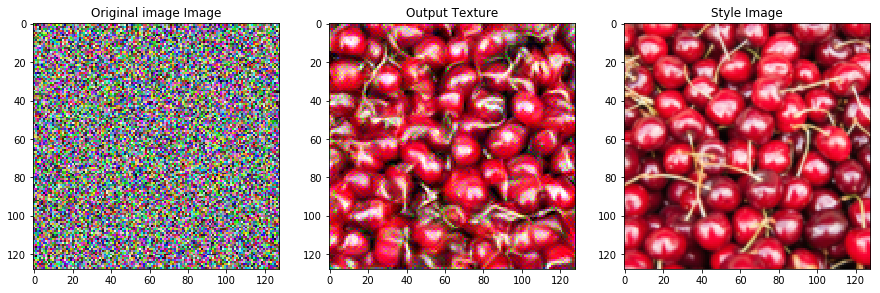

In [9]:
plt.figure(figsize=(15,15))

plt.subplot(1,3,1);
imshow(orig_input, title='Original image Image')
plt.subplot(1,3,2);
imshow(output_leaves, title='Output Texture')
plt.subplot(1,3,3);
imshow(style_img, title='Style Image')

# sphinx_gallery_thumbnail_number = 4
#plt.ioff()
plt.show()

In [14]:
output_leaves
img = imsave(output_leaves)
img.save('out_cherries.png')